In this notebook, I will create a DSGE model to describe the effects of the second Trump administration's policies on the American macroeconomy. I strive for this analysis to be both sober and non-partisan. I am going to be exploring the effect of signature Trump policies from the campaign trail:

- Cutting government spending
- Increased tariffs
- Increasing stock market evaluations
- Mass deportation
- Ending Fed independence (departure from Taylor rule)

Now, do I believe all of these policies will be implemented to the extent promised on the campaign trail? I think there are practical limitations such as pushback from legislators and unpopularity with key constitutencies. However, I believe we need to take the campaign promises seriously and acknowledge the new administration has a mandate to fulfill its bold new direction to both American monetary and fiscal policy. While this will be a heavily simplified model of the actual American macroeconomy, I hope to shed light on the underlying dynamics.

I want to thank Jesse Grabowski for his gEconpy package. This work is partially based on his examples and our implementation of it in a macroeconomics course he taught at Univ Paris 1 in 2022. Additionally, part of this code is adapted from my work with Camilo Saldarriaga. 

In [209]:
%matplotlib inline
import sys

sys.path.append("..")

import gEconpy as ge
import gEconpy.plotting as gp
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

import pandas as pd

import arviz as az

config = {
    "figure.figsize": (14, 4),
    "figure.dpi": 144,
    "figure.facecolor": "white",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.linewidth": 0.5,
    "axes.spines.top": False,
    "axes.spines.bottom": False,
    "axes.spines.left": False,
    "axes.spines.right": False,
}

plt.rcParams.update(config)
print(f"Running gEconpy version {ge.__version__}")

Running gEconpy version 1.2.1


In [210]:
model = ge.gEconModel("/Users/awalters/Trumponomics-DSGE/GCN Files/Full_New_Keyensian.gcn")

Model Building Complete.
Found:
	24 equations
	24 variables
	The following "variables" were defined as constants and have been substituted away:
		B_t
	4 stochastic shocks
		 0 / 4 has a defined prior. 
	17 parameters
		 0 / 17 has a defined prior. 
	2 calibrating equations
	2 parameters to calibrate
 Model appears well defined and ready to proceed to solving.



In [211]:
for equation in model.system_equations:
    display(equation)

-C_t + Div_t - I_t + K_t-1*r_t + L_t*w_t

I_t*(1 - gamma_I*(I_t/I_t-1 - 1*1)**2/2) - K_t + K_t-1*(1 - delta)

beta*U_t+1 - U_t + shock_preference_t*(-L_t**(sigma_L + 1)/(sigma_L + 1) + (-phi_H*C_t-1 + C_t)**(1 - sigma_C)/(1 - sigma_C))

-beta*phi_H*shock_preference_t+1/(-phi_H*C_t + C_t+1)**sigma_C - lambda_t + shock_preference_t/(-phi_H*C_t-1 + C_t)**sigma_C

beta*gamma_I*I_t+1**2*q_t+1*(-1 + I_t+1/I_t)/I_t**2 - lambda_t - q_t*(gamma_I*I_t*(I_t/I_t-1 - 1)/I_t-1 + gamma_I*(I_t/I_t-1 - 1*1)**2/2 - 1)

beta*(lambda_t+1*r_t+1 - q_t+1*(delta - 1)) - q_t

beta*lambda_t+1/pi_t+1 - lambda_t/r_G_t

-LHS_w_t + RHS_w_t

beta*eta_w*LHS_w_t+1*pi_t+1*(w_star_t+1/w_star_t)**(1/psi_w) - LHS_w_t + L_t*lambda_t*w_star_t*(w_t/w_star_t)**((psi_w + 1)/psi_w)/(psi_w + 1)

beta*eta_w*RHS_w_t+1*(pi_t+1*w_star_t+1/w_star_t)**((psi_w + 1)*(sigma_L + 1)/psi_w) - RHS_w_t + shock_preference_t*(L_t*(w_t/w_star_t)**((psi_w + 1)/psi_w))**(sigma_L + 1)

eta_w*(pi_t*w_t/w_t-1)**(1/psi_w) + (w_t/w_star_t)**(1/psi_w)*(1 - eta_w) - 1

rho_preference*log(shock_preference_t-1) + epsilon_preference_t - log(shock_preference_t)

-Div_t + TC_t + Y_t

K_t-1**alpha*L_t**(1 - alpha)*shock_technology_t - Y_t

-K_t-1*r_t - L_t*w_t - TC_t

alpha*K_t-1**(alpha - 1)*L_t**(1 - alpha)*mc_t*shock_technology_t - r_t

K_t-1**alpha*mc_t*shock_technology_t*(1 - alpha)/L_t**alpha - w_t

rho_technology*log(shock_technology_t-1) + epsilon_Y_t - log(shock_technology_t)

-LHS_t + RHS_t*(psi_p + 1)

beta*eta_p*LHS_t+1*pi_star_t*pi_t+1**(1/psi_p)/pi_star_t+1 - LHS_t + Y_t*lambda_t*pi_star_t

beta*eta_p*RHS_t+1*pi_t+1**((psi_p + 1)/psi_p) - RHS_t + Y_t*lambda_t*mc_t

eta_p*pi_t**(1/psi_p) - 1 + (1 - eta_p)/pi_star_t**(1/psi_p)

gamma_R*log(r_G_t-1/r_G_ss) + gamma_Y*(1 - gamma_R)*log(Y_t/Y_t-1) + gamma_pi*(1 - gamma_R)*log(-log(pi_obj_t) + pi_t/pi_ss) - phi_pi + epsilon_R_t + (1 - gamma_R)*log(pi_obj_t) - log(r_G_t/r_G_ss)

rho_pi_dot*log(pi_obj_t-1) + epsilon_pi_t + (1 - rho_pi_dot)*log(phi_pi_obj) - log(pi_obj_t)

In [212]:
for eq in model.calibrating_equations:
    display(eq)

-pi_obj_ss + pi_ss

pi_obj_ss - 1

In [213]:
%time model.steady_state()
model.print_steady_state()

Steady state found! Sum of squared residuals is 1.3411766504876084e-25
CPU times: user 1.78 s, sys: 101 ms, total: 1.88 s
Wall time: 1.9 s
C_ss                         1.506
Div_ss                       0.669
I_ss                         0.278
K_ss                        11.119
LHS_ss                       6.169
LHS_w_ss                     1.406
L_ss                         0.666
RHS_ss                       3.856
RHS_w_ss                     1.406
TC_ss                       -1.115
U_ss                      -147.270
Y_ss                         1.784
lambda_ss                    0.890
mc_ss                        0.625
pi_obj_ss                    1.000
pi_ss                        1.000
pi_star_ss                   1.000
q_ss                         0.890
r_G_ss                       1.010
r_ss                         0.035
shock_preference_ss          1.000
shock_technology_ss          1.000
w_ss                         1.088
w_star_ss                    1.088


In addition, the fo

In [214]:
%time model.f_ss(model.free_param_dict);

CPU times: user 672 µs, sys: 9 µs, total: 681 µs
Wall time: 679 µs


In [215]:
for eq in model.steady_state_system:
    display(eq)

-C_ss + Div_ss - I_ss + K_ss*r_ss + L_ss*w_ss

-delta*K_ss + I_ss

(U_ss*(beta - 1)*(sigma_C - 1)*(sigma_L + 1) - shock_preference_ss*(L_ss**(sigma_L + 1)*(sigma_C - 1) + (C_ss*(1 - phi_H))**(1 - sigma_C)*(sigma_L + 1)))/((sigma_C - 1)*(sigma_L + 1))

(-beta*phi_H*shock_preference_ss - lambda_ss*(C_ss*(1 - phi_H))**sigma_C + shock_preference_ss)/(C_ss*(1 - phi_H))**sigma_C

-lambda_ss + q_ss

beta*(lambda_ss*r_ss - q_ss*(delta - 1)) - q_ss

beta*lambda_ss/pi_ss - lambda_ss/r_G_ss

-LHS_w_ss + RHS_w_ss

(LHS_w_ss*(psi_w + 1)*(beta*eta_w*pi_ss - 1) + L_ss*lambda_ss*w_star_ss*(w_ss/w_star_ss)**((psi_w + 1)/psi_w))/(psi_w + 1)

beta*eta_w*RHS_w_ss*pi_ss**((psi_w + 1)*(sigma_L + 1)/psi_w) - RHS_w_ss + shock_preference_ss*(L_ss*(w_ss/w_star_ss)**((psi_w + 1)/psi_w))**(sigma_L + 1)

eta_w*pi_ss**(1/psi_w) + (w_ss/w_star_ss)**(1/psi_w)*(1 - eta_w) - 1

(rho_preference - 1)*log(shock_preference_ss)

-Div_ss + TC_ss + Y_ss

K_ss**alpha*L_ss**(1 - alpha)*shock_technology_ss - Y_ss

-K_ss*r_ss - L_ss*w_ss - TC_ss

alpha*K_ss**(alpha - 1)*L_ss**(1 - alpha)*mc_ss*shock_technology_ss - r_ss

(-K_ss**alpha*mc_ss*shock_technology_ss*(alpha - 1) - L_ss**alpha*w_ss)/L_ss**alpha

(rho_technology - 1)*log(shock_technology_ss)

-LHS_ss + RHS_ss*(psi_p + 1)

beta*eta_p*LHS_ss*pi_ss**(1/psi_p) - LHS_ss + Y_ss*lambda_ss*pi_star_ss

beta*eta_p*RHS_ss*pi_ss**((psi_p + 1)/psi_p) - RHS_ss + Y_ss*lambda_ss*mc_ss

(-eta_p + pi_star_ss**(1/psi_p)*(eta_p*pi_ss**(1/psi_p) - 1) + 1)/pi_star_ss**(1/psi_p)

-gamma_pi*(gamma_R - 1)*log(1 - log(pi_obj_ss)) - phi_pi - (gamma_R - 1)*log(pi_obj_ss)

rho_pi_dot*log(pi_obj_ss) - (rho_pi_dot - 1)*log(phi_pi_obj) - log(pi_obj_ss)

In [216]:
indicators = [
    "NAEXKP01USQ652S",  # GDP
    "USAGFCFQDSMEI",  # Investment
    "USAPFCEQDSMEI",  # HH consumption
    "TOTLQ",  # non-farm hours worked
    "FEDFUNDS",  # real interest rate
    "CES0500000003",  # average hourly wage
]

from pandas_datareader.fred import FredReader
import os

if not os.path.isfile("us_fred_data.csv"):
    data = FredReader(symbols=indicators, start="1900", end=None).read()
    data.to_csv("us_fred_data.csv")
else:
    data = pd.read_csv(
        "us_fred_data.csv",
        index_col=0,
        parse_dates=["DATE"],
    )

<Axes: xlabel='DATE'>

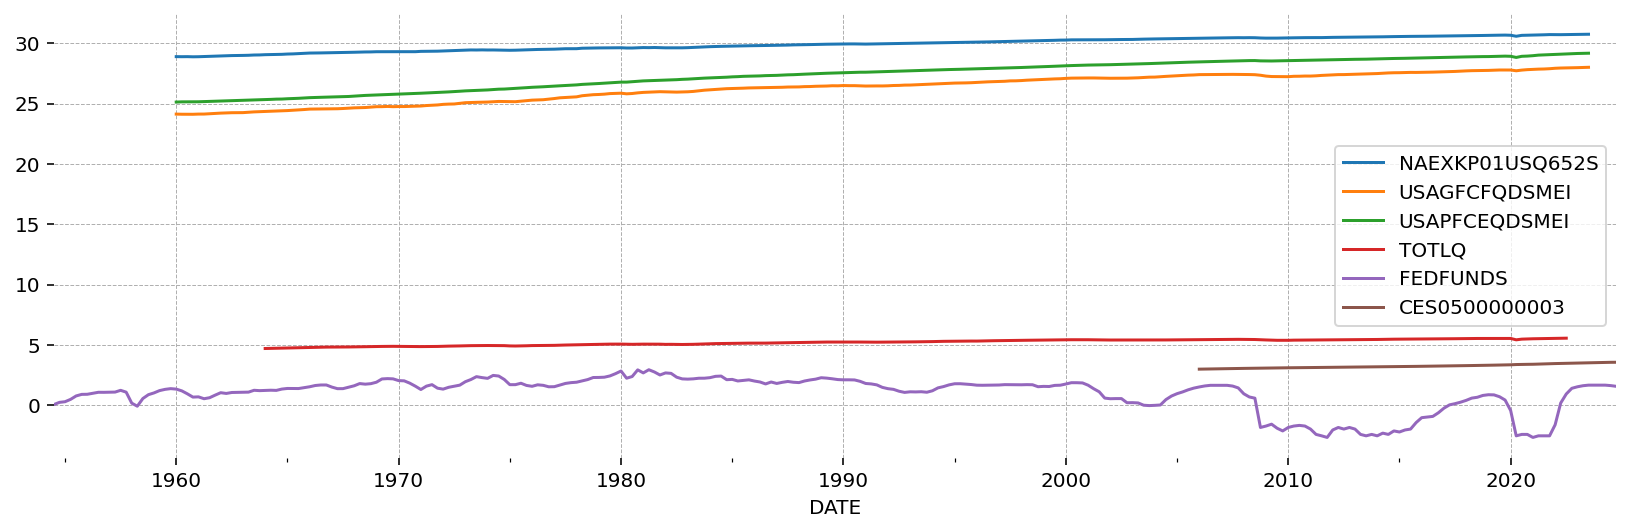

In [217]:
np.log(data).resample("QS").last().plot()

In [218]:
df = data.resample("QS").last()
df = df.rename(columns=dict(zip(indicators, ["Y", "I", "C", "L", "r", "w"])))
df.index.name = "Time"

# Regular at least 3 observed series
df.dropna(thresh=3, inplace=True)


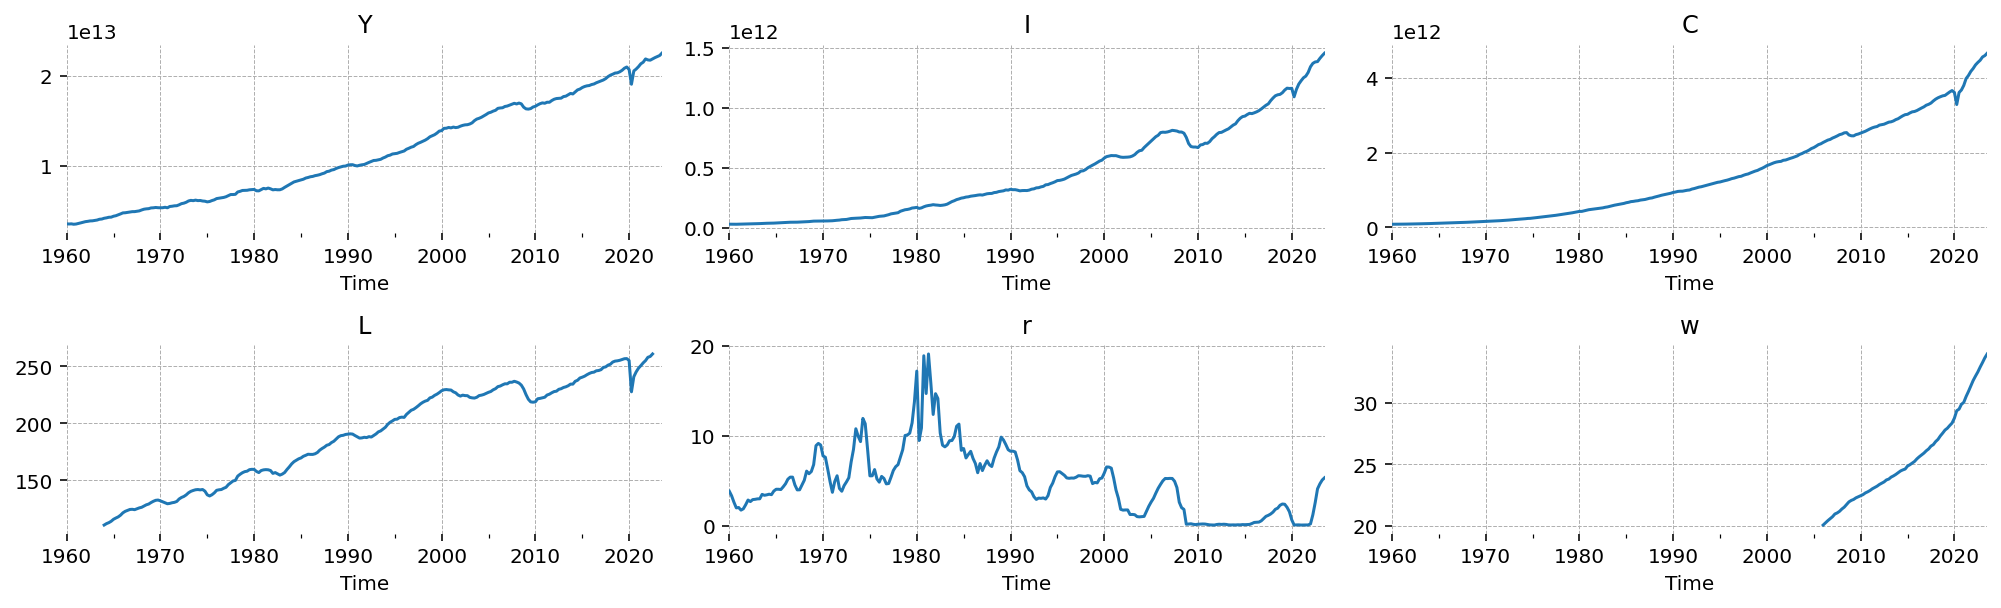

In [219]:
def plot_df(df):
    fig = plt.figure(figsize=(14, 6), dpi=144)
    gs, plot_locs = gp.prepare_gridspec_figure(n_cols=3, n_plots=df.shape[1])

    for loc, var in zip(plot_locs, df):
        axis = fig.add_subplot(gs[loc])
        df[var].plot(ax=axis)
        axis.set_title(var)

    fig.tight_layout()
    plt.show()


plot_df(df)

In [220]:
X = np.c_[np.ones(df.shape[0]), np.arange(df.shape[0]), np.arange(df.shape[0]) ** 2]
df_detrend = df.copy().apply(np.log)
df_detrend["r"] = df["r"].mul(1e-2).add(1)

for col in df:
    y = df_detrend[col]
    not_na = y.notna().values
    X_valid = X[not_na, :]
    beta = np.linalg.inv(X_valid.T @ X_valid) @ X_valid.T @ y.dropna()
    trend = X_valid @ beta
    resid = y.dropna() - trend
    df_detrend.loc[not_na, col] = resid

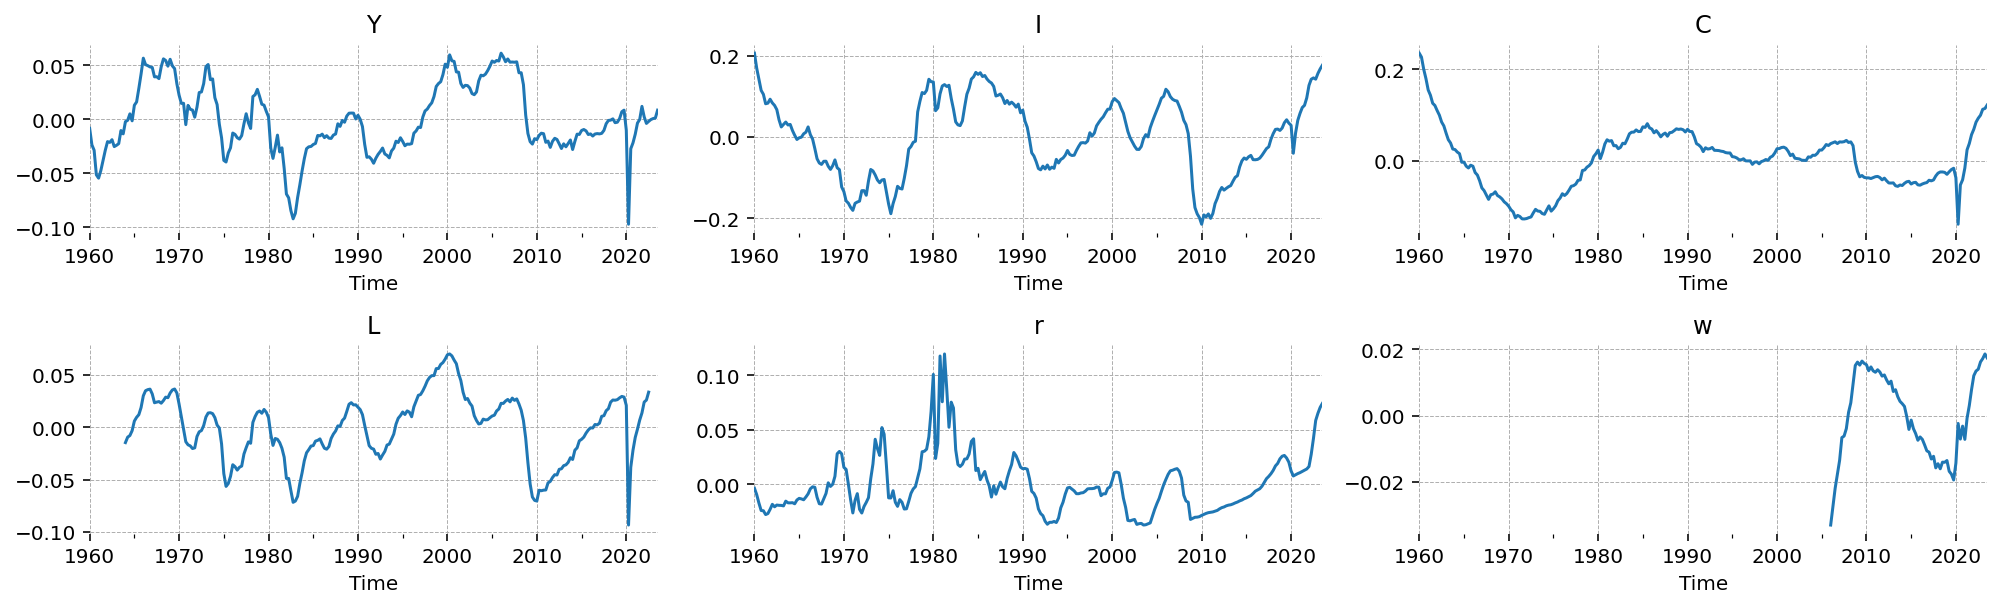

In [221]:
plot_df(df_detrend)

In [222]:
MLEModel = ge.compile_to_statsmodels(model)

In [223]:
calibrated_params = {"beta": 0.98, "alpha": 0.35, "sigma_L": 2.0, "delta": 0.05}
model.free_param_dict.update(calibrated_params)

In [224]:
from gEconpy.classes.transformers import PositiveTransformer, IntervalTransformer

param_start_dict = {
    "sigma_C": 1.5,
    "sigma_L": 2.0,
    #"rho_A": 0.85,
}

shock_start_dict = {"epsilon_A": 0.5}

noise_start_dict = {
    "C": 0.02,
    "L": 0.05,
    "I": 0.02,
    "r": 0.03,
    "w": 0.1,
}

# The slope parameter controls the steepness of the gradient around 0 (lower slope = more gentle gradient)
param_transforms = {
    "sigma_C": IntervalTransformer(low=1.05, high=10.0, slope=1),
    "sigma_L": IntervalTransformer(low=1.05, high=10.0, slope=1),
    #"rho_A": IntervalTransformer(low=1e-4, high=0.99, slope=1),
    #     'alpha':IntervalTransformer(low=0.1, high=0.80, slope=1)
}

mle_mod = MLEModel(
    df_detrend,
    param_start_dict=param_start_dict,
    shock_start_dict=shock_start_dict,
    noise_start_dict=noise_start_dict,
    param_transforms=param_transforms,
    shock_transforms=None,  # If None, will automatically transform to positive values only
    noise_transforms=None,  # If None, will automatically transform to positive values only
    initialization="stationary",
)

ValueError: The following shocks were given starting values, but did not appear in the model definition: 

In [225]:
mle_res = mle_mod.fit(method="nm", maxiter=10_000)
mle_res = mle_mod.fit(method="lbfgs", maxiter=1_000, start_params=mle_res.params)

Optimization terminated successfully.
         Current function value: -8.978986
         Iterations: 1265
         Function evaluations: 1972
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.97899D+00    |proj g|=  3.47898D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      1     10      1     0     0   3.479D-03  -8.979D+00
  F =  -8.9789856360027347     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [226]:
mle_res.summary()

/Users/awalters/opt/anaconda3/envs/oecd_project/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1420: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:     ['Y', 'I', 'C', 'L', 'r', 'w']   No. Observations:                  255
Model:                                  DSGEModel   Log Likelihood                 828.851
Date:                            Fri, 15 Nov 2024   AIC                          -1639.702
Time:                                    17:31:28   BIC                          -1607.830
Sample:                                01-01-1960   HQIC                         -1626.882
                                     - 07-01-2023                                         
Covariance Type:                              opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma_C              1.0500      5.904      0.178      0.859     -10.522      12.622
sigma_L             10.0000    541.273      0.018      0.985   -1050.875    1070.875
rho_A                0.9900      0.045     21.917      0.000       0.901       1.079
sigma2.epsilon_A     0.0115      0.040      0.290      0.772      -0.066       0.089
sigma2.C             0.1267      0.322      0.394      0.694      -0.504       0.758
sigma2.L             0.0701      0.124      0.565      0.572      -0.173       0.313
sigma2.I             0.0330      0.019      1.722      0.085      -0.005       0.071
sigma2.r             0.0444      0.112      0.395      0.693      -0.176       0.264
sigma2.w             0.0373      0.012      3.191      0.001       0.014       0.060
=====================================================================================================================================
Ljung-Box (L1) (Q):     0.02, 243.10, 240.68, 228.47, 211.91, 178.19   Jarque-Bera (JB):   6749.35, 8.68, 8.28, 3.70, 230.70, 1301.42
Prob(Q):                          0.88, 0.00, 0.00, 0.00, 0.00, 0.00   Prob(JB):                   0.00, 0.01, 0.02, 0.16, 0.00, 0.00
Heteroskedasticity (H):            1.85, 0.41, 0.13, 2.08, 0.38, inf   Skew:                    -1.12, 0.34, 0.35, -0.29, 1.61, -1.42
Prob(H) (two-sided):              0.01, 0.00, 0.00, 0.00, 0.00, 0.00   Kurtosis:                 28.10, 2.40, 3.53, 3.06, 6.36, 13.70
=====================================================================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (centered finite differences).
"""

In [227]:
def plot_sm_results(res, filter_output="predicted"):
    fig = plt.figure(figsize=(14, 8))

    endog_vars = res.data.ynames
    states = mle_res.states.predicted.columns

    gs, plot_locs = gp.prepare_gridspec_figure(n_cols=3, n_plots=len(states))

    for i, (name, loc) in enumerate(zip(states, plot_locs)):
        axis = fig.add_subplot(gs[loc])

        mu = getattr(res.states, filter_output)[name]
        sigma = getattr(res.states, filter_output + "_cov").loc[name, name]

        upper = mu + 1.98 * np.sqrt(sigma + 1e-8)
        lower = mu - 1.98 * np.sqrt(sigma + 1e-8)

        start_idx = 1 if filter_output == "predicted" else 0
        axis.plot(mle_res.data.dates, mu.values[start_idx:], label="Predicted")
        axis.fill_between(
            mle_res.data.dates,
            lower.values[start_idx:],
            upper.values[start_idx:],
            color="tab:blue",
            alpha=0.25,
        )

        if name in endog_vars:
            mle_res.data.orig_endog[name].plot(label="Data", ax=axis)

        axis.set(title=name)
    fig.tight_layout()
    title_text = (
        "One-Step Ahead" if filter_output == "predicted" else filter_output.title()
    )
    fig.suptitle(f"Kalman {title_text} Predictions", y=1.05)
    fig.axes[1].legend(
        bbox_to_anchor=(0.5, 0.98),
        loc="lower center",
        bbox_transform=fig.transFigure,
        ncols=2,
    )

    plt.show()

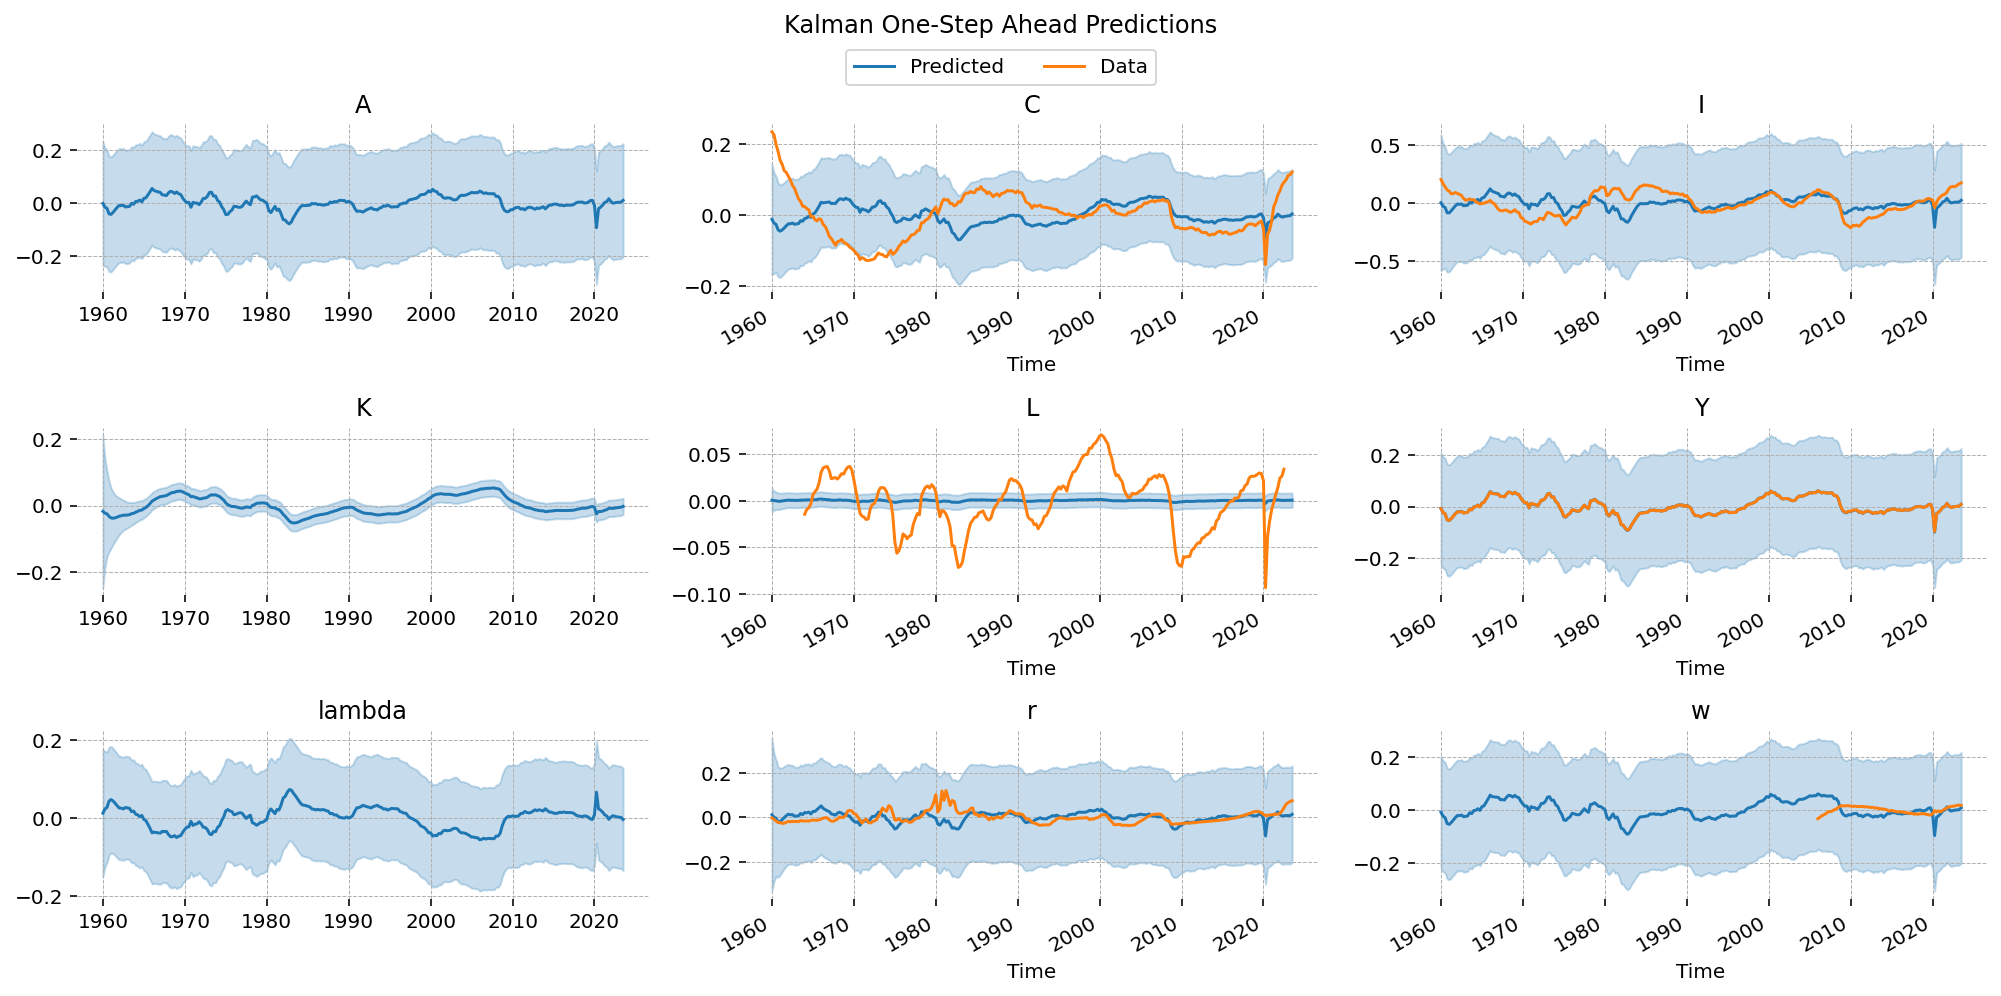

In [228]:
plot_sm_results(mle_res)

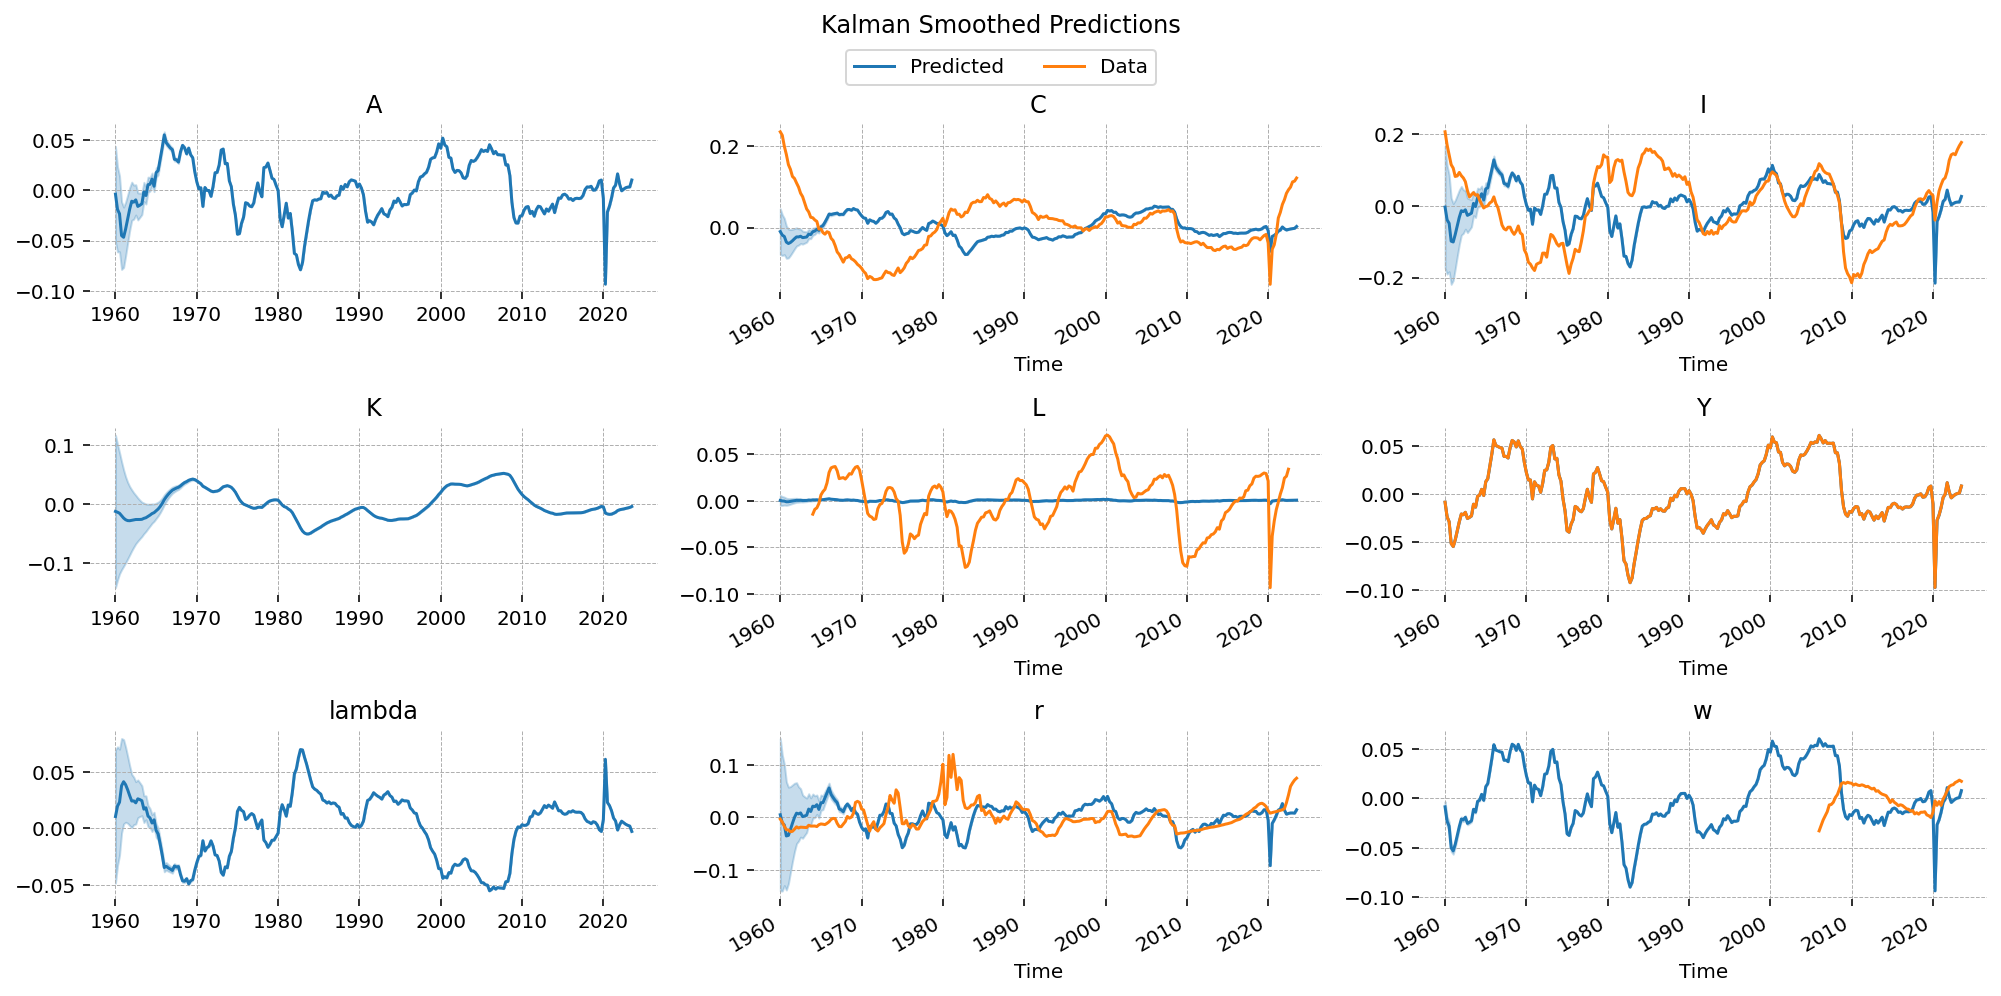

In [229]:
plot_sm_results(mle_res, "smoothed")

In [230]:
irf_df = mle_res.impulse_responses(impulse=0, steps=400, orthogonalized=False)
irf_df.index = pd.MultiIndex.from_product(
    [irf_df.index, ["epsilon_R"]], names=["Time", "Shocks"]
)
irf_df.columns.name = "Variables"


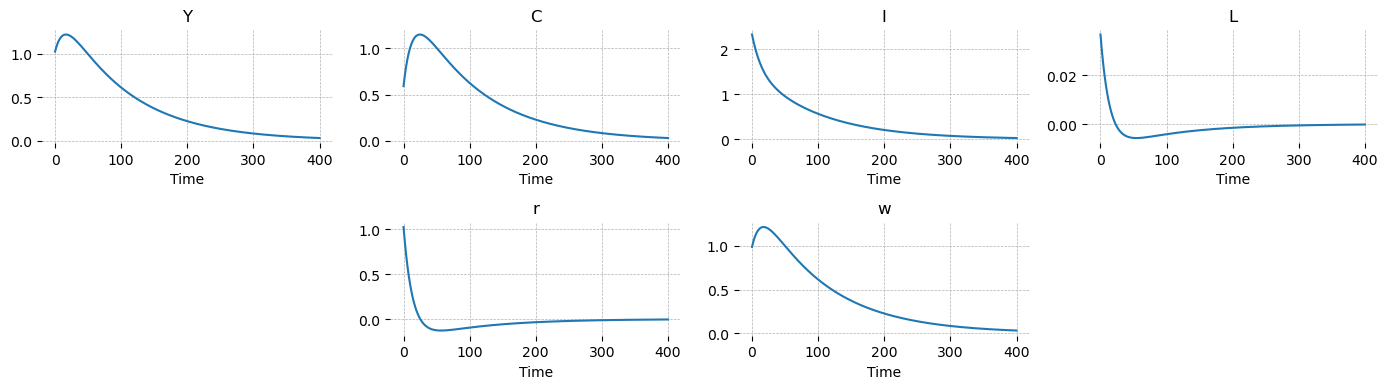

In [231]:
fig = gp.plot_irf(
    irf_df.T,
    shocks_to_plot=["epsilon_R"],
    vars_to_plot=["Y", "C", "I", "L", "r", "w"],
    figsize=(14, 4),
)
plt.show()


In [232]:
from scipy import stats

# Define priors for the observation noise

model.observation_noise_priors.update(
    {
        "Y": stats.gamma(2, scale=1 / 20),  # Trust Y more
        "C": stats.gamma(2, scale=1 / 10),
        "L": stats.gamma(2, scale=1 / 8),  # Trust L less
        "I": stats.gamma(2, scale=1 / 10),
        "r": stats.gamma(2, scale=1 / 10),
        "w": stats.gamma(2, scale=1 / 10),  # Trust w even less
    }
)

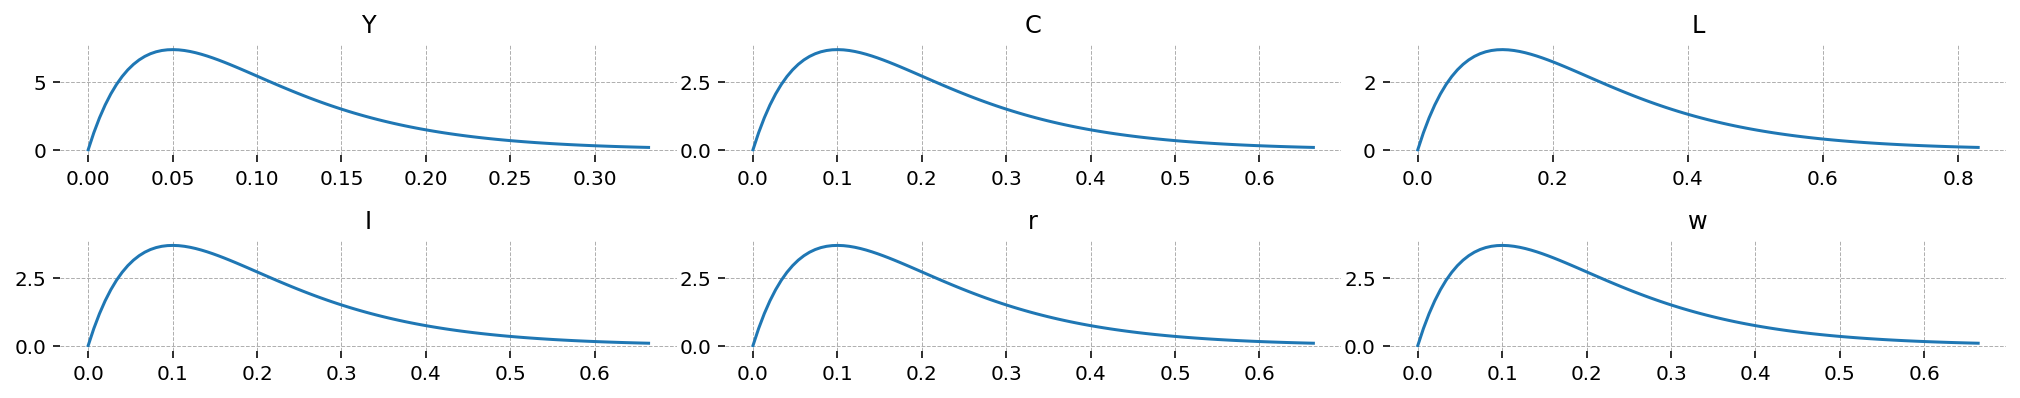

In [233]:
fig = plt.figure()
gs, plot_locs = gp.prepare_gridspec_figure(n_cols=3, n_plots=6)

for (name, d), loc in zip(model.observation_noise_priors.items(), plot_locs):
    x_grid = np.linspace(0, d.isf(0.01), 100)
    axis = fig.add_subplot(gs[loc])
    axis.plot(x_grid, d.pdf(x_grid))
    axis.set_title(name)
fig.tight_layout()
plt.show()

In [234]:
idata = model.fit(
    df_detrend, n_walkers=50, draws=10000, burn_in=2500, return_inferencedata=True
)

TypeError: unsupported operand type(s) for +: 'dict_keys' and 'list'

In [ ]:
az.summary(idata)